In [20]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [6]:
tips = sns.load_dataset("tips")

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


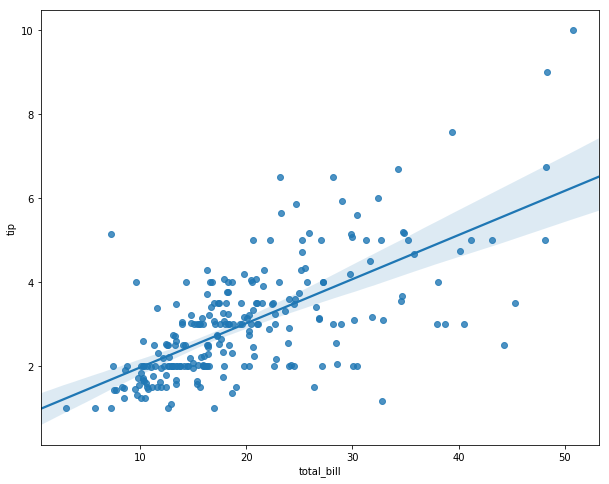

In [45]:
plt.figure(figsize = (10,8))
sns.regplot(tips['total_bill'], tips['tip'])

## Confidence Intervals for Coefficients

    Intervals are estimation methods in statistics that use sample data to produce ranges of values that are likely to contain the population value of interest. In contrast, point estimates are single value estimates of a population value. Of the different types of statistical intervals, confidence intervals are the most well-known. However, certain kinds of analyses and situations call for other types of ranges that provide different information.
    
$$\large Est \space \pm \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE_{Est}$$

    Recall Equation of line for a sample, 
    
$$\large \hat {y} \space = \space b_0 \space + \space b_1 x$$ 

    For Population, Equation of a line is:
    
$$\large y \space = \space \beta _{0} \space + \space \beta _{1} x$$

   To find confidence interval of population for Slope $(\beta _1)$ and Intercept $(\beta _0)$, the initial Point of Estimate is their sample $b_1$ and $b_0$.
   
    So, First equation can be re-written as follows, 
    
    Thus, (1 - alpha)% CI for:
    
    Slope is:
    
$$\large b_1 \space \pm \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE_{b_1} $$

    Intercept is:
    
$$\large b_0 \space \pm \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE_{b_0} $$   

    Where, 

$$\large SE_{slope} \space (b_1) \space = \space \frac {s} {\sqrt {\sum_{i = 1}^n {(x_i \space - \space \bar {x})^2}}} $$

$$\large SE_{intercept} \space (b_0) \space = \space s \cdot \sqrt {{\frac {1} {n}} \space + \space \frac {\bar {x}^2} {\sum_{i = 1}^n {(x_i \space - \space \bar {x})^2}}}$$

 

    Confidence interval calculations take sample data and produce a range of values that likely contains the population parameter that you are interested in. For example, the confidence interval of the mean [9 11] suggests that the population mean is likely to be between 9 and 11.
    
    Different random samples drawn from the same population are liable to produce slightly different confidence intervals. If you collect numerous random samples from the same population and calculate a confidence interval for each sample, a certain proportion of the ranges contain the population parameter. That percentage is the confidence level.
    
    Here are some important considerations for confidence intervals.
    
        > As you draw larger and larger random samples from the same population, the confidence intervals tend to become narrower.
        
        > As you increase the confidence level for a given same sample, say from 95% to 99%, the range becomes wider. At first, this fact might seem counter-intuitive, but think about it. To have greater confidence that an interval contains the parameter, it makes sense that the range must become wider. Conversely, a narrower range is less likely to include the parameter, which lowers your confidence.
        
        > A confidence interval for the mean says nothing about the dispersion of values around the mean.

In [85]:
import scipy.stats, numpy

def linear_regression(x, y, prob):
    """
    Return the linear regression parameters and their <prob> confidence intervals.
    ex:
        >>> linear_regression([.1,.2,.3],[10,11,11.5],0.95)

    """
    x = numpy.array(x)
    y = numpy.array(y)
    n = len(x)

    xy = x * y
    xx = x * x

    # estimates
    #b1 = (xy.mean() - x.mean() * y.mean()) / (xx.mean() - x.mean()**2)
    b1 = (n*(xy.sum()) - (x.sum() * y.sum())) / (n*(xx.sum()) - x.sum()**2)
    b0 = y.mean() - b1 * x.mean()
    s2 = 1./n * sum([(y[i] - b0 - b1 * x[i])**2 for i in range(n)])

    print ('b0 = ',b0)
    print ('b1 = ',b1)
    print ('s2 = ',s2)

    #confidence intervals
    alpha = 1 - prob
    c1 = scipy.stats.chi2.ppf(alpha/2.,n-2)
    c2 = scipy.stats.chi2.ppf(1-alpha/2.,n-2)
    
    print ('the confidence interval of s2 is: ',[n*s2/c2,n*s2/c1])

    c = -1 * scipy.stats.t.ppf(alpha/2.,n-2)
    bb1 = c * (s2 / ((n-2) * (xx.mean() - (x.mean())**2)))**.5

    print ('the confidence interval of b1 is: ',[b1-bb1,b1+bb1])

    bb0 = c * ((s2 / (n-2)) * (1 + (x.mean())**2 / (xx.mean() - (x.mean())**2)))**.5

    print ('the confidence interval of b0 is: ',[b0-bb0,b0+bb0])

    return None

In [4]:
import scipy.stats
scipy.stats.t.ppf(0.975, 242)

1.9698151341345511

In [26]:
linear_regression(tips['total_bill'], tips['tip'], 0.95)

b0 =  0.9202696135546691
b1 =  0.10502451738435357
s2 =  1.0360194420113766
the confidence interval of s2 is:  [0.8808548073035052, 1.2588755923337334]
the confidence interval of b1 is:  [0.0905172428805405, 0.11953179188816665]
the confidence interval of b0 is:  [0.6056216926952285, 1.2349175344141097]


In [90]:
linear_regression(tips['total_bill'], tips['tip'], 0.99)

b0 =  0.9202696135546722
b1 =  0.10502451738435341
s2 =  1.036019442011377
the confidence interval of s2 is:  [0.8358948036521129, 1.336872712218265]
the confidence interval of b1 is:  [0.08590333314278031, 0.1241457016259265]
the confidence interval of b0 is:  [0.5055507175690808, 1.3349885095402636]


## Prediction Interval    
    
    In statistical inference, specifically predictive inference, a prediction interval is an estimate of an interval in which a future observation will fall, with a certain probability, given what has already been observed. Prediction intervals are often used in regression analysis. 
    
    An example of prediction interval is as follows:
    
        Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome.
        
    In other words, A prediction interval is a range that likely contains the value of the dependent variable for a SINGLE new observation given specific values of the independent variables. With this type of interval, we’re predicting ranges for individual observations rather than the mean value.
    
    There is greater uncertainty when you predict an individual value rather than the mean value. Consequently, a prediction interval is always wider than the confidence interval of the prediction.
    
    Thus, level 100(1 - alpha)% PI(Prediction Interval) with DF = n - 2 is:
    
$$\large \hat {y} \space (x^*) \space \pm \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE_{\hat {y}(x^*)}$$

    So, that can be conveyed as,
    
$$\large \hat {y} \space - \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE \space <= \space y^{new} \space <= \space \hat {y} \space + \space t_{(1 \space - \space \alpha \space / \space 2); (n \space - \space 2)} \cdot SE$$    

![](predictioninterval.png)

In [4]:
def get_prediction_interval(prediction, y_test, test_predictions, c=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
    
    #get interval from standard deviation
    one_minus_c = 1 - c
    ppf_lookup = 1 - (one_minus_c / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    #generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    
    return lower, prediction, upper


#get_prediction_interval(predictions[0], y_test, predictions)


In [8]:
slope, intercept, r_value, p_value, std_error = linregress(tips['total_bill'], tips['tip'])

In [9]:
slope, intercept

(0.1050245173843534, 0.9202696135546726)

In [10]:
y = 0.9202 + 0.105*16.99

In [11]:
y

2.70415

In [17]:
y_predicted = []
for each in tips['total_bill']:
    y_predicted.append(slope*each+intercept)

print (np.array(y_predicted))

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259  2.80230897 3.05121707 2.57650625 5.06033609
 3.00185555 2.79075627 2.32444741 2.25303074 3.19930164 2.98400138
 1.92325375 2.84746951 2.50193885 3.09322688 2.78760553 3.4471595
 2.63321949 2.69833469 2.88317784 4.20438627 2.60486287 2.75399769
 2.38431139 1.93690694 4.11301494 2.84116804 3.25496464 4.32306398
 3.91871958 2.81491191 2.23727706 2.0009719  4.57617306 1.96421332
 3.60469628 2.96719746 4.91225152 3.69396712 2.10074519 5.98980307
 3.05121707 2.3706582  2.0776398  2.84116804 2.76765087 3.02916192
 2.64792292 1.24269488 3.0449156  2.49668762 2.18266431 2.71303813
 3.74122815 3.57528941 2.46728075 2.02407729 2.80230897 3.77693649
 3.31062763 2.73614352 2.96194623 2.66997807 1.9778665  4.35247084
 2.5985614  4.57827355 2.28873908 2.84011779 3.51542544 3.1425884


In [21]:
get_prediction_interval(2.70415, tips['tip'], np.array(y_predicted))

(0.7009732359350109, 2.70415, 4.707326764064989)

In [22]:
get_prediction_interval(y_predicted[1], tips['tip'], np.array(y_predicted))

(0.003046359243898067, 2.006223123308887, 4.009399887373876)